In [1]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#open dataset.csv
df = pd.read_csv('dataset/dataset.csv')

In [3]:
#view number of rows and columns
print(df.shape)
#view first 5 rows
display(df.head(10))

(912527, 25)


,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.geo.type,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type
0,1356029400056291335,2021-01-31T23:59:37.000Z,@FutureAgrics @FCDOAgResearch @IDS_UK @MSUAFRE...,1340303730625949697,OhreeeOfficial,Ohreee.eth,577,5,False,1354012224008974336,...,Feature,01eddd9d0dbec2c8,Ikeja,en,0,0,0,0,"[{""type"": ""replied_to"", ""id"": ""135401222400897...",NaN
1,1356029224277209088,2021-01-31T23:58:55.000Z,Hey! Managing your crypto would be so much eas...,1155606797195124736,schabrand,sachatouille,157,8,False,1356029224277209088,...,Feature,35c549e080e5518e,Rezé,en,0,0,0,0,NaN,NaN
2,1356027007717535744,2021-01-31T23:50:07.000Z,Just hit the 30k mark on #dogecoin hopefully t...,156424685,kariieem_,Karim,362,3,False,1356027007717535744,...,Feature,b046074b1030a44d,Jersey City,en,3,0,0,1,NaN,NaN
3,1356026690288410634,2021-01-31T23:48:51.000Z,Hey! Managing your crypto would be so much eas...,406867859,benoit_lange,Benoît,346,1,False,1356026690288410634,...,Feature,03f55c00556bf92d,Tournan-en-Brie,en,0,0,0,0,NaN,NaN
4,1356025158851387393,2021-01-31T23:42:46.000Z,"Come ask ANY questions about crypto, anytime, ...",1315389660252733440,NFTLadyEve,NFTeve 💯 2023,5819,38,False,1356025158851387393,...,Feature,01fbe706f872cb32,Washington,en,0,0,0,0,NaN,NaN
5,1356025092506087430,2021-01-31T23:42:30.000Z,@Bitboy_Crypto see it on sochain. Shows amount...,81417955,Jamendo123,Travis Jansma,61,2,False,1356025092506087430,...,Feature,0178e0b441628941,Hudsonville,en,0,0,0,0,NaN,NaN
6,1356024706651070475,2021-01-31T23:40:58.000Z,"Come ask ANY questions about crypto, anytime, ...",1315389660252733440,NFTLadyEve,NFTeve 💯 2023,5819,38,False,1356024706651070475,...,Feature,01fbe706f872cb32,Washington,en,7,0,0,0,NaN,NaN
7,1356024496512262144,2021-01-31T23:40:08.000Z,Why is there not a #DEX on the #bitcoin #block...,1057692519935311872,its_tl_,Steve Nelson Jr,354,6,False,1356024496512262144,...,Feature,348c0d2b6568bead,Hannibal,en,2,1,0,0,NaN,NaN
8,1356024092772724740,2021-01-31T23:38:32.000Z,@mrvillainbugs Just bough $5 😂😂😂 I have to tra...,2200895104,NurseLeeLeeLee,𝐃𝐞𝐜𝐞𝐧𝐜𝐲,1899,32,False,1356009173142667265,...,Feature,439beb879c4ddecc,Fruit Cove,en,0,0,0,0,"[{""type"": ""replied_to"", ""id"": ""135601554878256...",NaN
9,1356024010199490563,2021-01-31T23:38:12.000Z,Just withdrew the amount of money I essentiall...,23416945,PartyPrat,☄️🥂 𝕻𝖞𝖙𝖍𝖎𝖆 ᴿᴬᴳᴱᑫDᵢ̄ᵥ 𝕾𝖍𝖎𝖙𝖙𝖊𝖗𝖊𝖉 ✈️,14616,111,False,1356024010199490563,...,Feature,1e5cb4d0509db554,Vancouver,en,41,0,5,0,NaN,NaN


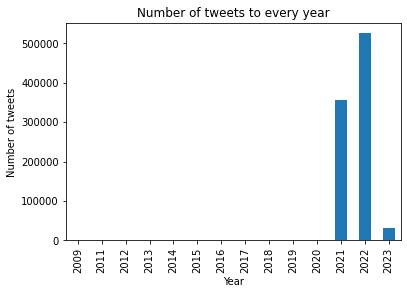

In [4]:
#plot the number of tweet to every year from created_at column and geo.country column
df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.year
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of tweets to every year')
plt.xlabel('Year')
plt.ylabel('Number of tweets')
plt.show()



#### Primo crollo 18/05/2020

In [5]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_1 = df[(df['created_at'] >= '2021-05-07') & (df['created_at'] <= '2021-05-19')]
df_1 = df_1.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_1 = df_1.reset_index(drop=True)
display (df_1.head(10))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,year
0,1391523807148527620,2021-05-09 22:41:43+00:00,SpaceX launching satellite Doge-1 to the moon ...,44196397,elonmusk,Elon Musk,127829693,113945,True,1391523807148527620,...,NaN,NaN,en,508942,15749,34035,106990,NaN,replied_to,2021
1,1392602041025843203,2021-05-12 22:06:14+00:00,Tesla &amp; Bitcoin https://t.co/YSswJmVZhP,44196397,elonmusk,Elon Musk,127829642,113945,True,1392602041025843203,...,NaN,NaN,en,472939,50315,115370,70428,NaN,quoted,2021
2,1392950720979030019,2021-05-13 21:11:46+00:00,"To be clear, I strongly believe in crypto, but...",44196397,elonmusk,Elon Musk,127829842,113945,True,1392950720979030019,...,NaN,NaN,en,347559,8152,54190,32174,NaN,quoted,2021
3,1390522866979033092,2021-05-07 04:24:20+00:00,"Cryptocurrency is promising, but please invest...",44196397,elonmusk,Elon Musk,127831360,113945,True,1390522866979033092,...,NaN,NaN,en,210248,4617,17455,35113,NaN,quoted,2021
4,1394170030741413888,2021-05-17 05:56:52+00:00,"@BTC_Archive To clarify speculation, Tesla has...",44196397,elonmusk,Elon Musk,127829868,113945,True,1394051036462071808,...,NaN,NaN,en,95142,7196,16689,16177,"[{""type"": ""replied_to"", ""id"": ""139405103646207...",replied_to,2021
5,1393939232373280769,2021-05-16 14:39:45+00:00,just let her enjoy astrology dude u like talki...,2845917028,bocxtop,first-mate prance,286017,250,True,1393939232373280769,...,NaN,NaN,en,91726,459,126,11378,NaN,quoted,2021
6,1392657323965829123,2021-05-13 01:45:55+00:00,Elon probably did not research how much energy...,902926941413453824,cz_binance,CZ 🔶 Binance,8134037,27699,True,1392657323965829123,...,NaN,NaN,en,59828,1247,5000,11388,"[{""type"": ""quoted"", ""id"": ""1392602041025843203...",replied_to,2021
7,1394625128257007618,2021-05-18 12:05:16+00:00,MicroStrategy has purchased an additional 229 ...,244647486,saylor,Michael Saylor⚡️,2931889,16772,True,1394625128257007618,...,NaN,NaN,en,57116,2096,3520,9895,NaN,replied_to,2021
8,1394005523083653120,2021-05-16 19:03:10+00:00,"I don’t get how Elon can run 4 companies, have...",1229475301945683969,juicecrypt0,Juice,4254,29,False,1394005523083653120,...,NaN,NaN,en,47124,750,1257,5968,NaN,quoted,2021
9,1393995872413888518,2021-05-16 18:24:49+00:00,@ChainLinkGod @PeterMcCormack Hey cryptocurren...,44196397,elonmusk,Elon Musk,127829978,113945,True,1393971202738302986,...,NaN,NaN,en,44812,2700,7130,6267,"[{""type"": ""replied_to"", ""id"": ""139399397501974...",replied_to,2021


In [6]:
#plot the number of tweet in every day from created_at between 2021/05/11 to 2021/05/24
#df['created_at'] = pd.to_datetime(df['created_at'])
#df['day'] = df['created_at'].dt.day
#df['day'].value_counts().sort_index().plot(kind='bar')
#plt.title('Number of tweets in every day')
#plt.xlabel('Day')
#plt.ylabel('Number of tweets')
#plt.show()



In [7]:
#create a plot with the id of twitter and the number of likes, retweets and replies
#df=pd.DataFrame(df,columns=["id","public_metrics.like_count","public_metrics.reply_count","public_metrics.retweet_count"])
#df.plot(x="id", y=["public_metrics.like_count","public_metrics.reply_count","public_metrics.retweet_count"], kind="bar")
#plt.title('')
#plt.xlabel('Id')
#plt.ylabel('Number of likes, replies and retweets')
#plt.show()



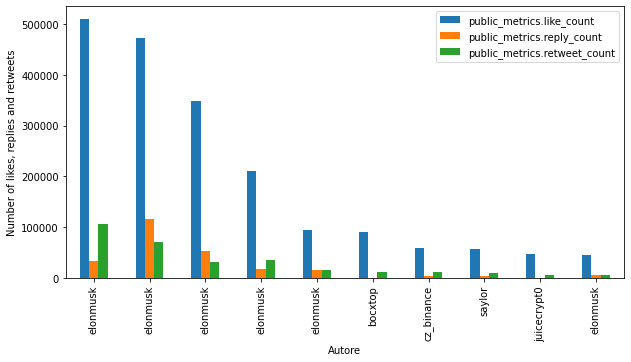

In [8]:
df_1=pd.DataFrame(df_1,columns=['author.username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'])

# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df1_sorted = df_1.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)

# Seleziona solo le prime 10 righe
df1_top10 = df1_sorted.head(10)
# Plotta il dataframe
df1_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


#### Incremento valore 

In [9]:
#select the rows with into the text column there are #bitcoin #luna #terra
df_2 = df[df['text'].str.contains('#lunaterra|#luna|#terra|#bitcoin|#blockchain|#crypto|#Crypto|#cryptocurre|#criptonews|#terraUSD|bitcoin|blockchain|crypto|cryptocurre|#stablecoin|stablecoin Terra', na=False, case=False)]
df_2 = df_2.reset_index(drop=True)


In [10]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_2 = df_2[(df_2['created_at'] >= '2021-09-22') & (df_2['created_at'] <= '2021-10-04')]
df_2 = df_2.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_2 = df_2.reset_index(drop=True)
display (df_2.head(10))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,year
0,1441416830485073924,2021-09-24 14:58:47+00:00,crypto is illegal and elon mucks gf broke up w...,36195015,BronzeHammer,John Hamburger Jr,58018,358,True,1441416830485073924,...,NaN,NaN,en,61470,284,133,7425,NaN,quoted,2021
1,1442949756993490945,2021-09-28 20:30:05+00:00,First steps...\n\n🌋#Bitcoin🇸🇻 https://t.co/duh...,20736511,nayibbukele,Nayib Bukele,4665548,4024,True,1442949756993490945,...,NaN,NaN,en,56368,2758,3268,11812,NaN,quoted,2021
2,1441846960332361730,2021-09-25 19:27:58+00:00,2.1 million Salvadorans are ACTIVELY USING @ch...,20736511,nayibbukele,Nayib Bukele,4665552,4024,True,1441846960332361730,...,NaN,NaN,en,39262,945,1881,7064,NaN,quoted,2021
3,1441398415712129024,2021-09-24 13:45:36+00:00,"China’s authoritarian crackdown on crypto, inc...",221162525,SenToomey,Senator Pat Toomey,191243,3021,True,1441398415712129024,...,NaN,NaN,en,38743,934,1957,7879,NaN,replied_to,2021
4,1441387389876723716,2021-09-24 13:01:48+00:00,🔍 New #Airdrop: Dr. Skull\n\n💲 Reward: Up to $...,1424243939716960260,DrSkull6,Dr. Skull,59298,9,False,1441387389876723716,...,NaN,NaN,en,34952,9410,7304,31834,NaN,replied_to,2021
5,1443629579416002567,2021-09-30 17:31:27+00:00,The United States has no intention to ban #Bit...,244647486,saylor,Michael Saylor⚡️,2931933,16774,True,1443629579416002567,...,NaN,NaN,en,33236,875,1376,7970,NaN,replied_to,2021
6,1444183509740883968,2021-10-02 06:12:35+00:00,💥 𝐓𝐇𝐄 $𝐑𝐄𝐍𝐀 𝐀𝐈𝐑𝐃𝐑𝐎𝐏 💥\nWARENA is giving away i...,1430363118392147968,WarenaOfficial,Warena | Hail To The Community 🤝,160018,306,False,1444183509740883968,...,NaN,NaN,en,31849,9978,6482,36209,NaN,replied_to,2021
7,1441389129665818626,2021-09-24 13:08:42+00:00,Nothing has created more wealth in the past de...,244647486,saylor,Michael Saylor⚡️,2931933,16774,True,1441389129665818626,...,NaN,NaN,en,31250,435,1182,5710,NaN,quoted,2021
8,1443893179196002307,2021-10-01 10:58:54+00:00,"#Bitcoin Sept closing price $43,834 .. like cl...",918804624303382528,100trillionUSD,PlanB,1867992,14653,False,1443893179196002307,...,NaN,NaN,en,31142,372,1540,4672,NaN,quoted,2021
9,1443235379218243591,2021-09-29 15:25:03+00:00,#biticaexchange \n\nHeloo dear all crypto curr...,1423345562896805892,BLOCKBEATSEX,BITICA EXCHANGE,56318,17,False,1443235379218243591,...,NaN,NaN,en,27437,19193,8949,28873,NaN,quoted,2021


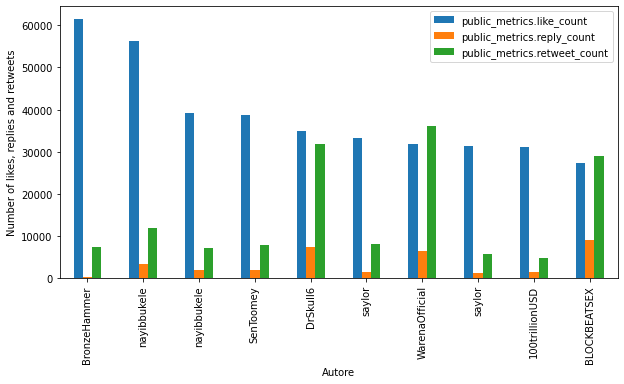

In [11]:
df_2=pd.DataFrame(df_2,columns=['author.username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'])

# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df1_sorted = df_2.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)

# Seleziona solo le prime 10 righe
df1_top10 = df1_sorted.head(10)
# Plotta il dataframe
df1_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


#### Crollo 16/01/2022 - 05/02/2022

In [12]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_3 = df[(df['created_at'] >= '2021-11-25') & (df['created_at'] <= '2022-02-05')]
df_3 = df_3.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_3 = df_3.reset_index(drop=True)
display (df_3.head(10))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,year
0,1477853317782855681,2022-01-03 04:04:22+00:00,my favourite part of twitter at the moment is ...,833400652143357952,samuel_clack,Dr Sam,957,4,False,1477853317782855681,...,NaN,NaN,en,187516,1793,612,38766,NaN,quoted,2022
1,1484456594775678976,2022-01-21 09:23:26+00:00,Twitter is spending engineering resources on t...,44196397,elonmusk,Elon Musk,127915619,113984,True,1484453889671942144,...,NaN,NaN,en,143654,1474,7653,9363,"[{""type"": ""replied_to"", ""id"": ""148445388967194...",replied_to,2022
2,1477356101796605956,2022-01-01 19:08:37+00:00,Crypto is over. This is the year of cryptic cu...,100301510,NotLasers,Jay Edidin 🧭,19621,409,False,1477356101796605956,...,NaN,NaN,en,133855,721,343,22820,NaN,quoted,2022
3,1485726032967704582,2022-01-24 21:27:44+00:00,how are you doing people who run crypto twitte...,71026122,McDonalds,McDonald's,4781235,9396,True,1485726032967704582,...,NaN,NaN,en,128526,7827,19399,21481,NaN,replied_to,2022
4,1466923617879351296,2021-12-04 00:13:39+00:00,the two genders are cryptocurrency and astrology,937931490855473153,skatie420,katie,127931,111,False,1466923617879351296,...,NaN,NaN,en,126384,1073,179,14622,NaN,quoted,2021
5,1469384932342566923,2021-12-10 19:14:02+00:00,My buddy telling me to invest in crypto I’m li...,82693379,caseyJsalengo,Casey James Salengo,7400,44,False,1469384932342566923,...,NaN,NaN,en,120652,558,172,12843,NaN,replied_to,2021
6,1487150299462647819,2022-01-28 19:47:15+00:00,Fucked around and bought 29 bitcoins today #Bi...,43775786,stoolpresidente,Dave Portnoy,2884255,7204,False,1487150299462647819,...,NaN,NaN,en,70036,1359,5615,4525,NaN,replied_to,2022
7,1467720876741525504,2021-12-06 05:01:40+00:00,Just saw someone describe crypto as 'Mary Kay ...,20169416,tracyalloway,Tracy Alloway,179458,3947,True,1467720876741525504,...,NaN,NaN,en,67935,1339,545,12314,NaN,quoted,2021
8,1467000621354135555,2021-12-04 05:19:38+00:00,El Salvador just bought the dip! 🇸🇻\n\n150 coi...,20736511,nayibbukele,Nayib Bukele,4665920,4024,True,1467000621354135555,...,NaN,NaN,en,67884,2245,3200,8921,NaN,replied_to,2021
9,1488842310175571971,2022-02-02 11:50:42+00:00,É fácil odiar NFT quando você não entende de f...,214615408,fefofeitosa,Fernando Feitosa,1362,15,False,1488842310175571971,...,NaN,NaN,pt,61936,508,367,7404,NaN,quoted,2022


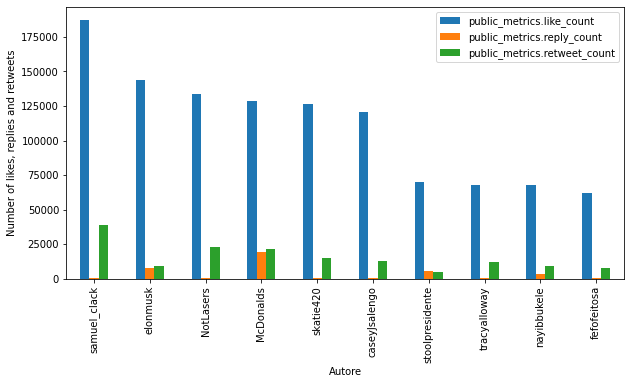

In [13]:
df_3=pd.DataFrame(df_3,columns=['author.username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'])

# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df1_sorted = df_3.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)

# Seleziona solo le prime 10 righe
df1_top10 = df1_sorted.head(10)
# Plotta il dataframe
df1_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


#### Crollo 5/05/2022 - 18-05-2022 restringere fino al giorno del crollo

In [16]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_4 = df[(df['created_at'] >= '2022-05-05') & (df['created_at'] <= '2022-05-18')]
df_4 = df_4.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_4 = df_4.reset_index(drop=True)
display (df_4.head(10))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,year
0,1525083159725056002,2022-05-13 11:58:54+00:00,Crypto bros yesterday vs. Crypto bros today #w...,1542862735,Ryanair,Ryanair,701591,2243,True,1525083159725056002,...,NaN,NaN,en,231324,4634,2833,23565,NaN,replied_to,2022
1,1524724947460911104,2022-05-12 12:15:30+00:00,"If you invested $100 in Luna one month ago, th...",16877374,paleofuture,Matt Novak,30120,1166,False,1524724947460911104,...,NaN,NaN,en,161564,2306,1056,12208,NaN,replied_to,2022
2,1525123256977612800,2022-05-13 14:38:14+00:00,crypto is an mlm for people who think they're ...,17158189,MikeDrucker,Mike Drucker,206545,2289,True,1525123256977612800,...,NaN,NaN,en,103898,736,676,10230,NaN,replied_to,2022
3,1523742670044413954,2022-05-09 19:12:16+00:00,El Salvador just bought the dip! 🇸🇻\n\n500 coi...,20736511,nayibbukele,Nayib Bukele,4668515,4028,True,1523742670044413954,...,NaN,NaN,en,99887,4092,6144,13362,NaN,quoted,2022
4,1523646766549434373,2022-05-09 12:51:11+00:00,Monday morning is time to get back to work. #B...,244647486,saylor,Michael Saylor⚡️,2932171,16773,True,1523646766549434373,...,NaN,NaN,en,87148,1483,4068,11038,NaN,quoted,2022
5,1525276705144901632,2022-05-14 00:47:59+00:00,"I recently heard ""Crypto is Mary Kay for men""",330105456,indyfromspace,Dr. Sarah Parcak,91208,886,True,1525276705144901632,...,NaN,NaN,en,74877,893,498,9074,NaN,replied_to,2022
6,1524940435659038732,2022-05-13 02:31:46+00:00,1/ I am convinced the disillusioned young men ...,17264476,BriannaWu,Brianna Wu,143240,2722,True,1524940435659038732,...,NaN,NaN,en,65496,1593,1558,8017,NaN,replied_to,2022
7,1526029996787216387,2022-05-16 02:41:18+00:00,"Tomorrow, 32 central banks and 12 financial au...",20736511,nayibbukele,Nayib Bukele,4668483,4028,True,1526029996787216387,...,NaN,NaN,en,55435,2796,3052,12645,NaN,quoted,2022
8,1523816383443787788,2022-05-10 00:05:11+00:00,What I've learned today:\n\n1 Bitcoin = 1 Bitc...,1356434353623093249,greg16676935420,greg,400811,1240,False,1523816383443787788,...,NaN,NaN,en,40518,312,1011,4469,NaN,quoted,2022
9,1524935730308456448,2022-05-13 02:13:04+00:00,The Terra blockchain has officially halted at ...,1022028994772910086,terra_money,Terra 🌍 Powered by LUNA 🌕,1116423,4829,True,1524935730308456448,...,NaN,NaN,en,34679,1708,10434,7964,NaN,replied_to,2022


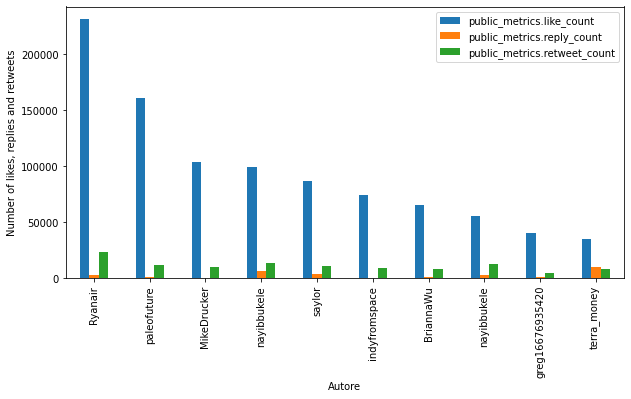

In [17]:
df_4=pd.DataFrame(df_4,columns=['author.username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'])

# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df1_sorted = df_4.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)

# Seleziona solo le prime 10 righe
df1_top10 = df1_sorted.head(10)
# Plotta il dataframe
df1_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()
